we use spacytextblob to process the sentiment analysis. Spacytextblob is a TextBlob sentiment analysis pipeline that adds extra textblob class attributes to the Spacy framework.

In [2]:
# Should there be problems with importing textblob, let's install the packages again:

!pip install spacytextblob
!python -m textblob.download_corpora

# Preperation: install spacytextblob following the instruction here: https://spacytextblob.netlify.app/ 

  Using cached numpy-2.0.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp312-cp312-macosx_10_9_x86_64.whl (20.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.2 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

A module that was compiled using NumPy 1.x ca

In [ ]:
#we first import spacy and spacytextblob as we did in the previous tutorials.
#make sure you have spacy, spacytextblob and the models installed.

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm') # choose the language model for nlp

#then we can see the built-in pipelines we have loaded. They are used when calling the nlp to tokenize the text
print(nlp.pipe_names)

In [ ]:
# now we add the textblob pipeline
if not 'spacytextblob' in nlp.pipe_names:
    nlp.add_pipe('spacytextblob') # here we add the spacytextblob pipeline
else:
    print("spacytextblob already loaded!")

print(nlp.pipe_names)

In [ ]:
from textblob import TextBlob

# Load my text corpus,now I just test one article
with open("./raw_corpus/BBC/BBC2025_01_27.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Perform sentiment analysis on the entire corpus
blob = TextBlob(text)

# Get overall polarity and subjectivity
polarity = blob.sentiment.polarity  # Range: -1 (negative) to 1 (positive)
subjectivity = blob.sentiment.subjectivity  # Range: 0 (objective) to 1 (subjective)

# Print overall sentiment
print(f"Overall Sentiment Polarity: {polarity}")
print(f"Overall Sentiment Subjectivity: {subjectivity}")

# Interpreting the polarity for a general attitude:
if polarity > 0:
    print("The overall sentiment is positive.")
elif polarity < 0:
    print("The overall sentiment is negative.")
else:
    print("The overall sentiment is neutral.")


In [ ]:
# Load my text corpus, it's the whole corpus
with open("./all_text.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Perform sentiment analysis
blob = TextBlob(text)

# Get polarity and subjectivity
polarity = blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
subjectivity = blob.sentiment.subjectivity  # Ranges from 0 (objective) to 1 (subjective)

# Print results
print(f"Sentiment Polarity: {polarity}")
print(f"Sentiment Subjectivity: {subjectivity}")



Now I try to Track Sentiment Over Time,analyze how the tone of media articles evolves,

In [ ]:
from textblob import TextBlob
import pandas as pd
# We analyze BBC first  
# We put articles and dates in a pandas DataFrame, I input titles manually,maybe has another easy way?
data = {
    'article': [
        'BBC News: Is China\'s AI tool DeepSeek as good as it seems?', 
        'BBC News: DeepSeek: How China\'s \'AI heroes\' overcame US curbs to stun Silicon Valley',
        'BBC News: China\'s DeepSeek AI shakes industry and dents America\'s swagger',  
        'BBC News: UK will not be able to resist China\'s tech dominance',
        'BBC News: DeepSeek: What lies under the bonnet of the new AI chatbot?',
        'BBC News: DeepSeek: The Chinese AI app that has the world talking',
        'BBC News: World leaders set to vie for AI domination at Paris summit has shaken up the world of AI',
        'BBC News: \'DeepSeek moved me to tears\': How young Chinese find therapy in AI'
    ],  
    'date': ['2025-01-27', '2025-01-28', '2025-01-28', '2025-01-28', '2025-02-01', '2025-02-04', '2025-02-06', '2025-02-12']  # No change here
}  

df = pd.DataFrame(data)

# Perform sentiment analysis
df['polarity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Print the resulting DataFrame
print(df)

# Save the resulting DataFrame to a CSV file
output_path = './bbc_sentiment_analysis.csv'  
df.to_csv(output_path, index=False)

# Print a message to confirm export
print(f"Data exported successfully to {output_path}")


In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment over time (e.g., daily)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['polarity'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Polarity Over Time(BBC)')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
from textblob import TextBlob
import pandas as pd
# We analyze The New York Times
# We put articles'titles and dates in a pandas DataFrame
data = {
    'article': [
        'NYTime: What to Know About DeepSeek and How It Is Upending A.I.',
        'NYTime: First Impressions of DeepSeek’s A.I. Chatbot',
        'NYTime: Why DeepSeek Could Change What Silicon Valley Believes About A.I.',
        'NYTime: Inside China, DeepSeek Provides a National Mic Drop Moment',
        'NYTime: Who Is the Founder of the A.I. Start-Up DeepSeek?',
        'NYTime: Meta Engineers See Vindication in DeepSeek’s Apparent Breakthrough',
        'NYTime: OpenAI Says DeepSeek May Have Improperly Harvested Its Data',
        'NYTime: They Invested Billions. Then the A.I. Script Got Flipped.',
        'NYTime: The DeepSeek drama may have been briefly eclipsed by everything in Washington',
        'NYTime: DeepSeek’s Answers Include Chinese Propaganda, Researchers Say',
        'NYTime: DeepSeek Is a Win for China in the A.I. Race. Will the Party Stifle It?',
        'NYTime: China Challenges Silicon Valley for A.I. Dominance',
        'NYTime: Stop Worshiping the American Tech Giants',
        'NYTime: Is Artificial Intelligence Really Worth the Hype?',
        'NYTime: What DeepSeek? Big Tech Keeps Its A.I. Building Boom Alive.',
        'NYTime: What DeepSeek’s Success Says About China’s Ability to Nurture Talent',
        'NYTime: How Did DeepSeek Build Its A.I. With Less Money?',
        'NYTime: DeepSeek Doesn’t Scare OpenAI, Thanks to the ‘Jevons Paradox’',
        'NYTime: South Korea Bans Downloads of DeepSeek, the Chinese A.I. App',
    ],  
    'date': ['2025-01-27','2025-01-27', '2025-01-28', '2025-01-28','2025-01-29','2025-01-29','2025-01-29', '2025-01-29','2025-01-30', '2025-01-31','2025-02-02','2025-02-03','2025-02-04','2025-02-07','2025-02-08','2025-02-10','2025-02-12','2025-02-14','2025-02-17']  
}  

# Create DataFrame from the data
df = pd.DataFrame(data)

# Perform sentiment analysis using TextBlob
df['polarity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Print the resulting DataFrame with sentiment analysis results
print(df)
# Save the resulting DataFrame to a CSV file
output_path = './NYTime_sentiment_analysis.csv'  
df.to_csv(output_path, index=False)

# Print a message to confirm export
print(f"Data exported successfully to {output_path}")


In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment over time (e.g., daily)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['polarity'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Polarity Over Time(NYTime)')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

one article from 2Febrary:"DeepSeek Is a Win for China in the A.I. Race. Will the Party Stifle It?'"has a very high score0.8,polarity. So we can analyze further the content of the article, and keywords, and use antconc to compare keywords, tosee

In [ ]:
from textblob import TextBlob
import pandas as pd

# We analyze CNN 
# Input articles and dates in a pandas DataFrame
data = {
    'article': [
        'CNN:A shocking Chinese AI advancement called DeepSeek is sending US stocks plunging',
        'CNN:What is DeepSeek, the Chinese AI startup that shook the tech world?',
        'CNN:DeepSeek just blew up the AI industrys narrative that it needs more money and power',
        'CNN:DeepSeek chaos suggests America First may not always win',
        'CNN:China celebrates DeepSeeks breakout AI success as tech race heats up',
        'CNN:DeepSeek is giving the world a window into Chinese censorship and information control',
        'CNN:Why DeepSeek could mark a turning point for Silicon Valley on AI',
        'CNN:Australia bans DeepSeek on government devices over security concerns',
        'CNN:A pair of US lawmakers are seeking to ban government workers from using Chinese startup DeepSeeks',
        'CNN:DeepSeek hasnt just disrupted OpenAI. Chinese tech giants are being upended too',
        'CNN:The real reason behind the DeepSeek hype, according to AI experts',
        'CNN:AI giants Baidu, OpenAI offer their chatbots for free in response to DeepSeek’s advance',
    ],  
    'date': [ '2025-01-27','2025-01-27','2025-01-28','2025-01-28','2025-01-28','2025-01-29','2025-01-29','2025-02-04','2025-02-06','2025-02-11','2025-02-14','2025-02-14']  # No change here
}  

df = pd.DataFrame(data)

# Perform sentiment analysis
df['polarity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Print the resulting DataFrame
print(df)
# Save the resulting DataFrame to a CSV file
output_path = './CNN_sentiment_analysis.csv'  
df.to_csv(output_path, index=False)

# Print a message to confirm export
print(f"Data exported successfully to {output_path}")

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment over time (e.g., daily)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['polarity'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Polarity Over Time(CNN)')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from textblob import TextBlob
import pandas as pd
# We try to see each article in the whole corpus
# We put all the articles and dates in a pandas DataFrame
data = {
    'article': [
        'CNN:A shocking Chinese AI advancement called DeepSeek is sending US stocks plunging',
        'CNN:What is DeepSeek, the Chinese AI startup that shook the tech world?',
        'CNN:DeepSeek just blew up the AI industrys narrative that it needs more money and power',
        'CNN:DeepSeek chaos suggests America First may not always win',
        'CNN:China celebrates DeepSeeks breakout AI success as tech race heats up',
        'CNN:DeepSeek is giving the world a window into Chinese censorship and information control',
        'CNN:Why DeepSeek could mark a turning point for Silicon Valley on AI',
        'CNN:Australia bans DeepSeek on government devices over security concerns',
        'CNN:A pair of US lawmakers are seeking to ban government workers from using Chinese startup DeepSeeks',
        'CNN:DeepSeek hasnt just disrupted OpenAI. Chinese tech giants are being upended too',
        'CNN:The real reason behind the DeepSeek hype, according to AI experts',
        'CNN:AI giants Baidu, OpenAI offer their chatbots for free in response to DeepSeek’s advance',
        'NYTime: What to Know About DeepSeek and How It Is Upending A.I.',
        'NYTime: First Impressions of DeepSeek’s A.I. Chatbot',
        'NYTime: Why DeepSeek Could Change What Silicon Valley Believes About A.I.',
        'NYTime: Inside China, DeepSeek Provides a National Mic Drop Moment',
        'NYTime: Who Is the Founder of the A.I. Start-Up DeepSeek?',
        'NYTime: Meta Engineers See Vindication in DeepSeek’s Apparent Breakthrough',
        'NYTime: OpenAI Says DeepSeek May Have Improperly Harvested Its Data',
        'NYTime: They Invested Billions. Then the A.I. Script Got Flipped.',
        'NYTime: The DeepSeek drama may have been briefly eclipsed by everything in Washington',
        'NYTime: DeepSeek’s Answers Include Chinese Propaganda, Researchers Say',
        'NYTime: DeepSeek Is a Win for China in the A.I. Race. Will the Party Stifle It?',
        'NYTime: China Challenges Silicon Valley for A.I. Dominance',
        'NYTime: Stop Worshiping the American Tech Giants',
        'NYTime: Is Artificial Intelligence Really Worth the Hype?',
        'NYTime: What DeepSeek? Big Tech Keeps Its A.I. Building Boom Alive.',
        'NYTime: What DeepSeek’s Success Says About China’s Ability to Nurture Talent',
        'NYTime: How Did DeepSeek Build Its A.I. With Less Money?',
        'NYTime: DeepSeek Doesn’t Scare OpenAI, Thanks to the ‘Jevons Paradox’',
        'NYTime: South Korea Bans Downloads of DeepSeek, the Chinese A.I. App',
        'BBC News: Is China\'s AI tool DeepSeek as good as it seems?', 
        'BBC News: DeepSeek: How China\'s \'AI heroes\' overcame US curbs to stun Silicon Valley',
        'BBC News: China\'s DeepSeek AI shakes industry and dents America\'s swagger',  
        'BBC News: UK will not be able to resist China\'s tech dominance',
        'BBC News: DeepSeek: What lies under the bonnet of the new AI chatbot?',
        'BBC News: DeepSeek: The Chinese AI app that has the world talking',
        'BBC News: World leaders set to vie for AI domination at Paris summit has shaken up the world of AI',
        'BBC News: \'DeepSeek moved me to tears\': How young Chinese find therapy in AI'
    ],  
    'date': [ '2025-01-27','2025-01-27','2025-01-28','2025-01-28','2025-01-28','2025-01-29','2025-01-29','2025-02-04','2025-02-06','2025-02-11','2025-02-14','2025-02-14','2025-01-27','2025-01-27', '2025-01-28', '2025-01-28','2025-01-29','2025-01-29','2025-01-29', '2025-01-29','2025-01-30', '2025-01-31','2025-02-02','2025-02-03','2025-02-04','2025-02-07','2025-02-08','2025-02-10','2025-02-12','2025-02-14','2025-02-17','2025-01-27', '2025-01-28', '2025-01-28', '2025-01-28', '2025-02-01', '2025-02-04', '2025-02-06', '2025-02-12',]  # No change here
}  

df = pd.DataFrame(data)

# Perform sentiment analysis
df['polarity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['article'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Print the resulting DataFrame
print(df)

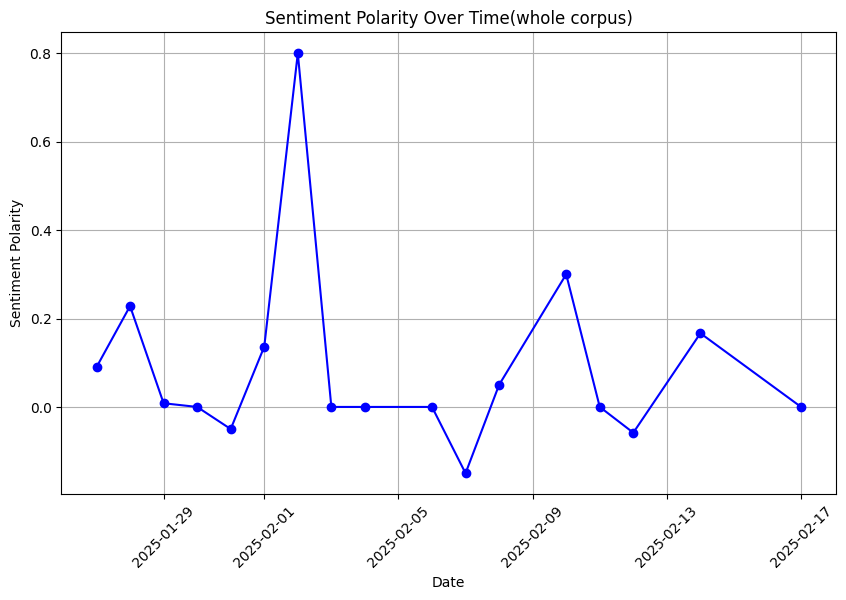

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group polarity by date and calculate average
grouped = df.groupby('date')['polarity'].mean().reset_index()

# Plot sentiment over time (e.g., daily)
plt.figure(figsize=(10, 6))
plt.plot(grouped['date'], grouped['polarity'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Polarity Over Time(whole corpus)')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [42]:
#I want to filter the articles based on sentiment polarity. 
#After performing sentiment analysis, we apply a filter to only keep the articles where the polarity is greater than 0.4.
# Filter articles where polarity > 0.4
filtered_df_high = df[df['polarity'] > 0.4]

# Print the filtered DataFrame
print(filtered_df_high)

# Save the filtered data to a new CSV file
output_path = './filtered_0.4_sentiment_analysis.csv'
filtered_df_high.to_csv(output_path, index=False)

# Print a message to confirm export
print(f"Filtered data exported successfully to {output_path}")

                                              article       date  polarity  \
2   CNN:DeepSeek just blew up the AI industrys nar... 2025-01-28     0.500   
3   CNN:DeepSeek chaos suggests America First may ... 2025-01-28     0.525   
22  NYTime: DeepSeek Is a Win for China in the A.I... 2025-02-02     0.800   
31  BBC News: Is China's AI tool DeepSeek as good ... 2025-01-27     0.700   
34  BBC News: UK will not be able to resist China'... 2025-01-28     0.500   

    subjectivity  
2       0.500000  
3       0.366667  
22      0.400000  
31      0.600000  
34      0.625000  
Filtered data exported successfully to ./filtered_0.4_sentiment_analysis.csv


In [44]:
# Filter articles where polarity < -0.1
filtered_df_low = df[df['polarity'] <= -0.1]

# Print the filtered DataFrame
print(filtered_df_low)

# Save the filtered data to a new CSV file
output_path = './filtered_-0.1_sentiment_analysis.csv'
filtered_df_low.to_csv(output_path, index=False)

# Print a message to confirm export
print(f"Filtered data exported successfully to {output_path}")

                                              article       date  polarity  \
0   CNN:A shocking Chinese AI advancement called D... 2025-01-27 -0.500000   
10  CNN:The real reason behind the DeepSeek hype, ... 2025-02-14 -0.100000   
25  NYTime: Is Artificial Intelligence Really Wort... 2025-02-07 -0.150000   
28  NYTime: How Did DeepSeek Build Its A.I. With L... 2025-02-12 -0.166667   

    subjectivity  
0       0.500000  
10      0.500000  
25      0.550000  
28      0.066667  
Filtered data exported successfully to ./filtered_-0.1_sentiment_analysis.csv


In [50]:
# combine two filtered data
filtered_df_combined = pd.concat([filtered_df_high, filtered_df_low])
print(filtered_df_combined)

                                              article       date  polarity  \
2   CNN:DeepSeek just blew up the AI industrys nar... 2025-01-28  0.500000   
3   CNN:DeepSeek chaos suggests America First may ... 2025-01-28  0.525000   
22  NYTime: DeepSeek Is a Win for China in the A.I... 2025-02-02  0.800000   
31  BBC News: Is China's AI tool DeepSeek as good ... 2025-01-27  0.700000   
34  BBC News: UK will not be able to resist China'... 2025-01-28  0.500000   
0   CNN:A shocking Chinese AI advancement called D... 2025-01-27 -0.500000   
10  CNN:The real reason behind the DeepSeek hype, ... 2025-02-14 -0.100000   
25  NYTime: Is Artificial Intelligence Really Wort... 2025-02-07 -0.150000   
28  NYTime: How Did DeepSeek Build Its A.I. With L... 2025-02-12 -0.166667   

    subjectivity  
2       0.500000  
3       0.366667  
22      0.400000  
31      0.600000  
34      0.625000  
0       0.500000  
10      0.500000  
25      0.550000  
28      0.066667  


In [52]:
#Use Topic Modeling (Latent Dirichlet Allocation, LDA) 
#to uncover the main topics in your articles. 
#This can help you see if the high-sentiment articles tend to focus on certain topics compared to the low-sentiment ones.
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing the articles using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_df_combined['article'])

# Fit LDA model to the data
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # You can change the number of topics
lda.fit(X)

# Display top words for each topic
n_words = 10  # Number of words to display for each topic
words = vectorizer.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    print(f"Topic {i + 1}:")
    top_words_idx = topic.argsort()[-n_words:][::-1]
    top_words = [words[i] for i in top_words_idx]
    print(" ".join(top_words))


Topic 1:
deepseek cnn money ai win just power narrative blew needs
Topic 2:
china deepseek nytime bbc news dominance resist able tech uk
Topic 3:
ai hype deepseek cnn shocking sending called plunging stocks chinese


In [56]:
# As we see, the result is not good,so before topic modeling,we should clean data and take away stopwords first
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

import nltk  # Import nltk 
nltk.download('stopwords')  # Call the download function

from nltk.corpus import stopwords  # Import stopwords

# Define common stopwords from nltk and your custom stopwords
common_stopwords = stopwords.words('english')  # Common stopwords like "is", "the", "it"
# Define custom stopwords to exclude specific words like "deepseek", "cnn", "ai", etc.
custom_stopwords = [
    "deepseek", "cnn", "ai", "just", "bbc", "news","nytime", "able", "chinese", "called","china","artificial","intelligence"
]
# Combine both lists of stopwords
all_stopwords = common_stopwords + custom_stopwords

print(all_stopwords)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /Users/lulu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Vectorizing the articles using CountVectorizer with custom stopwords
vectorizer = CountVectorizer(stop_words=all_stopwords)
X = vectorizer.fit_transform(filtered_df_combined['article'])

# Fit LDA model to the data
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Change the number of topics if needed
lda.fit(X)

# Display top words for each topic
n_words = 8  # Number of words to display for each topic
words = vectorizer.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    print(f"Topic {i + 1}:")
    top_words_idx = topic.argsort()[-n_words:][::-1]  # Get top word indices
    top_words = [words[i] for i in top_words_idx]  # Map indices to words
    print(" ".join(top_words))

Topic 1:
hype according behind experts real reason resist uk
Topic 2:
win always america suggests chaos first may build
Topic 3:
money shocking stocks sending plunging advancement us blew
